<a href="https://colab.research.google.com/github/TreeLiquid/Intro-to-ML/blob/main/Shigapov_4105_HW3_Q2-5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Setup

In [164]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA

In [155]:
from google.colab import drive
drive.mount('/content/drive')

#Obtain file data
cancer = '/content/drive/My Drive/Fall-2023/Intro-to-ML/Datasets/cancer.csv'
cancerData = pd.DataFrame(pd.read_csv(cancer))
cancerData.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Pre-Processing

In [156]:
#Converting M/B to 1/0
varlist = ['diagnosis']

#Map Func (I am not converting furnishing status as the HW doesn't require me to)
def binary_map(x):
  return x.map({'M': 1, 'B': 0})

cancerData[varlist] = cancerData[varlist].apply(binary_map)
cancerData.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Question 2a

In [157]:
X = cancerData.iloc[:,[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]]
y = cancerData.iloc[:, 1].values

X = pd.DataFrame(X)
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [158]:
#Scaling
scale = StandardScaler()
X_std = scale.fit_transform(X)

#Splitting
X_train, X_test, y_train, y_test = train_test_split(X_std, y, train_size=0.8, test_size=0.2, random_state=0)

#LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

#Prediction
Y_pred = classifier.predict(X_test)

#Outputs
print("Accuracy:", metrics.accuracy_score(y_test, Y_pred))
print("Precision:", metrics.precision_score(y_test, Y_pred))
print("Recall:", metrics.recall_score(y_test, Y_pred))
print("F1 Score:", metrics.f1_score(y_test,Y_pred))

Accuracy: 0.9649122807017544
Precision: 0.9574468085106383
Recall: 0.9574468085106383
F1 Score: 0.9574468085106385


In [159]:
#Confusion Matrix
matrix = confusion_matrix(y_test, Y_pred)
print(matrix)

[[65  2]
 [ 2 45]]


Text(0.5, 427.9555555555555, 'Predicted label')

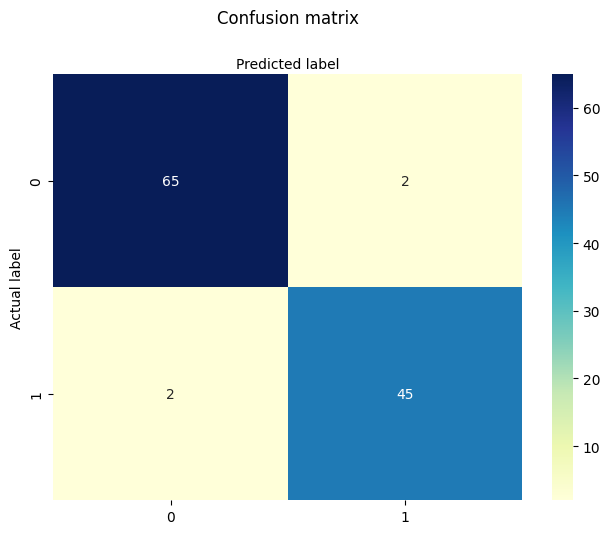

In [160]:
#Creating a heatmap
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Question 2b

In [161]:
#LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

#Prediction
Y_pred = classifier.predict(X_test)

#Outputs
print("Accuracy:", metrics.accuracy_score(y_test, Y_pred))
print("Precision:", metrics.precision_score(y_test, Y_pred))
print("Recall:", metrics.recall_score(y_test, Y_pred))
print("F1 Score:", metrics.f1_score(y_test,Y_pred))

Accuracy: 0.9649122807017544
Precision: 0.9574468085106383
Recall: 0.9574468085106383
F1 Score: 0.9574468085106385


In [162]:
#Confusion Matrix
matrix = confusion_matrix(y_test, Y_pred)
print(matrix)

[[65  2]
 [ 2 45]]


Text(0.5, 427.9555555555555, 'Predicted label')

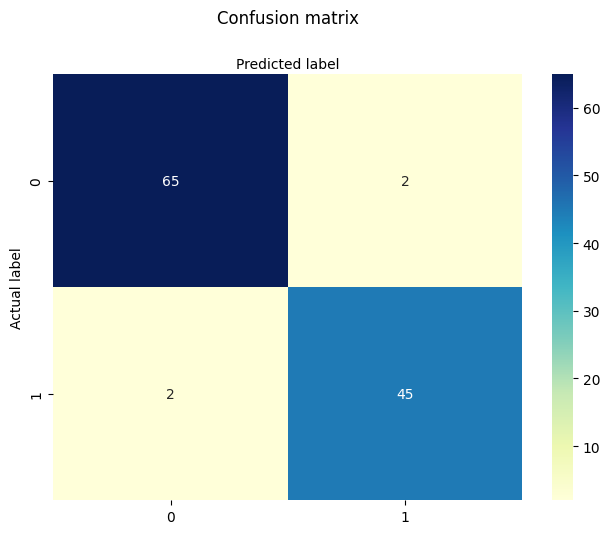

In [163]:
#Creating a heatmap
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Question 3

In [165]:
model = GaussianNB()
model.fit(X, y)

expected = y
predicted = model.predict(X)

print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       357
           1       0.95      0.89      0.92       212

    accuracy                           0.94       569
   macro avg       0.94      0.93      0.94       569
weighted avg       0.94      0.94      0.94       569

[[347  10]
 [ 23 189]]
